In [1]:
setwd('C:/Users/bki19/desktop/Bayesian_NBA')

# 베이지안 기법을 이용한 NBA 우승 팀 예측

NBA 리그팀 중에 어떤 팀이 2019 플레이오프에서 우승할까? <br>
- 시즌 동안 강했던 상대한테 플레이오프에서도 강하지 않을까?<br>
- 베이지안과 Frequentist 방법을 비교<br>

<b>목차</b>
1. 모델링
2. 데이터 소개
3. 전처리
4. MLE
5. Independence Sampler
6. Conjugacy
7. Monte-carlo Simulation

# 1. 모델링

- 매년 선수 영입에 따라 팀의 실력 변화가 크기 때문에 리그 경기 결과만 이용<br>
- NBA는 리그 동안 팀당 약 82경기를 치르게 됨
- 팀 간에 비기는 경우는 없음
- 팀 간의 상대 전적을 이용해서 모델링

<b>Bernoulli 분포 가정과 사후 분포</b>

팀 $i$가 팀 $j$를 이기는 경우는 이기고 지고 두 결과 밖에 없기 때문에 Bernoulli 분포를 따른다고 가정<br>
사후 분포로는 Conjugacy를 이용하기 위해 Beta 분포 가정

데이터의 분포: $X_{i,j} \sim iid  Bernoulli(p_{i,j})$ ;   팀 i가 팀 j이기면 $X_{i,j}=1$  <br>
사전 분포: $p_{i,j} \sim Beta(\alpha, \beta)$<br>
사후 분포: $p_{i,j}|X_{i,j} \sim Beta(x_{i,j}+\alpha,1-x_{i,j}+\beta)$

- $p_{i,j}$: 팀 i가 팀 j를 이길 확률<br>
- $p_{j,i}=1-p_{i,j}$ : 비길 확률 없음<br>
- $X_{ij}$는 팀 i가 팀 j를 이길 확률에 대한 확률 변수로 비기는 경우가 없이 이기고 지는 경우만 고려해 Beroulli 분포를 따른다고 가정<br>
- 모수 $p_{ij}$는 conjugate prior인 Beta 분포를 가정,이를 통해 사후 분포도 Beta로 쉽게 구할 수 있음

<b>Binomial 분포 가정과 사후 분포</b>

- 팀마다 상대팀을 만나는 횟수는 다름
- 팀$i$가 팀 $j$을 이길 확률은 이전 결과가 영향을 주지 않는다고 단순화 (Independency)
- 따라서 팀 i가 팀 j를 이긴 횟수에 대한 분포 $Y_{ij}$는 iid 가정에 의해 Binomial 분포를 따르게 됨

$Y_{i,j} \sim iid Binomial(n_{i,j},p_{i,j})$<br>
$p_{i,j} \sim Beta (\alpha,\beta)$<br>
$p_{i,j}|Y_{i,j} \sim Beta (y_{i,j}+\alpha,n_{i,j}-y_{i,j}+\beta $<br>

MLE<br>
$\hat{p}_{i,j}=\frac{y_{i,j}}{n_{i,j}}$

Bayesian Poseterior Mean<br>
$E[p_{i,j}|Y_{i,j}]=\frac{y_{i,j}+\alpha}{n_{i,j}+\alpha+\beta} $

- MLE:Binomial 분포를 가정했기 때문에 MLE는 해당 팀의 총 경기 수 중에 이긴 경기의 수의 비율로 쉽게 구할 수 있음<br>
- Posterior Mean: 확률 변수이기 때문에 확률적 기댓값을 갖게 됨


# 2. 데이터 소개

In [3]:
#Division Folder
Leagues<-list.files('./data')
Leagues
length(Leagues)

[1] "Atlantic Division"  "Central Division"   "Northwest Division"
[4] "Pacific Division"   "Southeast Division" "Southwest Division"

[1] 6

데이터는 6개의 디비전으로 구성되어 있음

In [4]:
#Team Name List
TEAMS=c()
for (i in 1:6){
    a<-paste0('./data/',Leagues[i])
    TEAMS=c(TEAMS, list.files(a)  )
}
TEAMS2<-gsub('.{4}$', '', TEAMS)
TEAMS2

[1] "Boston Celtics"         "Philadelphia 76ers"     "Toronto Raptors"       
 [4] "Detroit Pistons"        "Indiana Pacers"         "Milwaukee Bucks"       
 [7] "Denver Nuggets"         "Oklahoma City"          "Portland Trail Blazers"
[10] "Utah Jazz"              "Golden State Warriors"  "Los Angeles Clippers"  
[13] "Orlando Magic"          "Houston Rockets"        "San Antonio Spurs"

폴더: 속한 리그<br>
파일: 해당 리그에서 파이널에 진출한 팀 => 폴더마다 다른 숫자의 csv 파일이 들어 있음<br>
<br>
파일마다 해당 팀이 리그 내에서 어떤 팀에게 이기고 졌는지에 대한 기록이 있음=> 파이널에 진출 안한 팀에 대한 기록까지 있음<br>

In [5]:
#Number of Playoff teams in data
NUM_TEAMS=c()
for (i in 1:6){
    b<-paste0('./data/',Leagues[i])
    NUM_TEAMS=c(NUM_TEAMS, length(list.files(b) )  )
}

In [6]:
data.frame(League=Leagues, Teams= NUM_TEAMS)
length(TEAMS2)
TEAMS2

League,Teams
Atlantic Division,3
Central Division,3
Northwest Division,4
Pacific Division,2
Southeast Division,1
Southwest Division,2


[1] 15

[1] "Boston Celtics"         "Philadelphia 76ers"     "Toronto Raptors"       
 [4] "Detroit Pistons"        "Indiana Pacers"         "Milwaukee Bucks"       
 [7] "Denver Nuggets"         "Oklahoma City"          "Portland Trail Blazers"
[10] "Utah Jazz"              "Golden State Warriors"  "Los Angeles Clippers"  
[13] "Orlando Magic"          "Houston Rockets"        "San Antonio Spurs"

- 총 15개의 팀의 경기 기록 (Brooklyn Nets 누락)<br>
- 플레이오프 진출하지 않은 팀과의 경기 기록도 있음 => 플레이오프 팀 간 상대 전적만 고려하기 때문에 제거<br>
- Oklahoma City가 다른 팀과 경기한 기록은 있지만 다른 팀이 Oklahoma City와 경기한 기록은 누락 됨<br>
- Oklahoma City 경기 기록을 바탕으로 다른 팀과 Oklahoma City가 경기한 기록 복원<br>
- Brooklyn Nets와 경기한 데이터를 바탕으로 Brooklyn Nets 데이터 복원

In [7]:
#Add Brooklyn Nets
TEAMS2<-c(TEAMS2,'Brooklyn Nets')

# 3. 데이터 전처리

In [8]:
#Load Multiple Data from Multiple Folders

Read_Function<-function(H){
    #Make path for loading multiple files
    Leagues<-list.files('./data')
    TEAMS=c()
    PATH<-c()
    for (i in 1:6){
        a<-paste0('./data/',Leagues[i])
        b<-list.files(a) #list of files in the folder
        for (j in 1:length(b)){
            c<-paste0 (paste0(a,'/'),b[j])
            PATH<-c(PATH,c)
        }

    }
    
    #Make derived variable win Frequency, Total Frequency, Mean
    df<-read.csv(PATH[H])
    df$WIN<-ifelse(df[,'X']=='W',1,0)
    df$COUNT<-ifelse(df[,'X']=='W',1,1)

    df2<-df[,c('Opponent','COUNT')]
    df2<-aggregate(COUNT~.,FUN=sum,data=df2)
    
    df<-df[,c('Opponent','WIN')]
    df<-aggregate(WIN~.,FUN=sum,data=df)
    
    df$Freq<-df2$COUNT
    df$MEAN<-df$WIN/df$Freq
    
    #remain variable of interest

    df3<-data.frame(Opponent=c(),WIN=c(),Freq=c(),MEAN=c())
    NOT<-c()
    for (i in 1:16){
        if ( TEAMS2[i]  %in%  unique(df[,'Opponent']) ){
            df3=rbind(df3, df[df[,'Opponent']== TEAMS2[i],]  )

        }
        else{
            NOT<-data.frame(Opponent=TEAMS2[i],WIN=NA,Freq=NA,MEAN=NA)
            names(NOT)<-names(df)
            df3<-rbind(df3,NOT)
            }
        }
    return (df3)
    
}

In [9]:
## fill missing data and drop useless data
B<-Read_Function(8)# oklahoma
df<-list()
for (i in 1:15){
    df[[i]]<-Read_Function(i)
    df[[i]][8,c('WIN','Freq','MEAN')]<-c((B[i,]$Freq-B[i,]$WIN),B[i,]$Freq,((B[i,]$Freq-B[i,]$WIN)/B[i,]$Freq))
    df[[i]]<-na.omit(df[[i]])
}

Oklahoma City와의 경기 기록 복원<br>
Oklahoma City와 경기한 상대팀의 기록은 모두 결측 되어 있음<br>
다행히도 Oklahoma City의 csv 파일 안에는 상대팀에 대한 기록들이 기록되어 있어 이것을 토대로 결측치 처리

In [10]:
D<-data.frame(Opponent= NA,WIN= NA,Freq=NA,MEAN= NA)
for (i in 1:15){
    C<-data.frame(Opponent= TEAMS2[i],WIN= (df[[i]][15,'Freq']-df[[i]][15,'WIN']),Freq=df[[i]][15,'Freq'],MEAN= (df[[i]][15,'Freq']-df[[i]][15,'WIN'])/  df[[i]][15,'Freq'])
    D<-rbind(D,C)
}
df[[16]]<-D[-1,]

In [11]:
#Brooklyn Nets
df[[16]]

,Opponent,WIN,Freq,MEAN
2,Boston Celtics,2,4,0.5000000
3,Philadelphia 76ers,2,4,0.5000000
4,Toronto Raptors,1,4,0.2500000
5,Detroit Pistons,2,3,0.6666667
6,Indiana Pacers,1,3,0.3333333
7,Milwaukee Bucks,1,4,0.2500000
8,Denver Nuggets,2,2,1.0000000
9,Oklahoma City,0,2,0.0000000
10,Portland Trail Blazers,0,2,0.0000000
11,Utah Jazz,0,2,0.0000000


Brooklyn Nets 복구

In [12]:
Count_matrix=matrix(0,16,16)
colnames(Count_matrix)=TEAMS2
rownames(Count_matrix)=TEAMS2

Mean_matrix=matrix(0,16,16)
colnames(Mean_matrix)=TEAMS2
rownames(Mean_matrix)=TEAMS2

Win_matrix=matrix(0,16,16)
colnames(Win_matrix)=TEAMS2
rownames(Win_matrix)=TEAMS2

Count_matrix: 팀 간 경기 횟수을 기록한 행렬<br>
Mean_matrix: 팀 간 승률을 기록한 행렬<br>
Win_matrix: 팀 간 승리 횟수를 기록한 행렬

In [13]:
for (i in 1:16){
    c<-df[[i]][,'WIN']
    c<-append(c,NA,(i-1))
    Win_matrix[i,]<-c
    
    d<-df[[i]][,'MEAN']
    d<-append(d,NA,(i-1))
    Mean_matrix[i,]<-d
    
    e<-df[[i]][,'Freq']
    e<-append(e,NA,(i-1))
    Count_matrix[i,]<-e
}

In [14]:
Mean_matrix

,Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
Boston Celtics,NA,0.7500000,0.5000000,0.7500000,0.7500000,0.3333333,0.00,1.0000000,0.0000000,0.0000000,0.5000000,0.0000000,0.0000000,0.0000000,0.0000000,0.5000000
Philadelphia 76ers,0.2500000,NA,0.2500000,0.7500000,0.7500000,0.3333333,0.50,0.5000000,0.0000000,1.0000000,0.5000000,1.0000000,0.5000000,0.5000000,0.5000000,0.5000000
Toronto Raptors,0.5000000,0.7500000,NA,0.0000000,0.6666667,0.2500000,0.00,0.5000000,0.5000000,1.0000000,1.0000000,1.0000000,0.5000000,0.0000000,0.5000000,0.7500000
Detroit Pistons,0.2500000,0.2500000,1.0000000,NA,0.2500000,0.0000000,0.50,0.0000000,0.5000000,0.0000000,0.5000000,0.5000000,0.7500000,0.5000000,0.0000000,0.3333333
Indiana Pacers,0.2500000,0.2500000,0.3333333,0.7500000,NA,0.2500000,0.50,0.5000000,0.0000000,1.0000000,0.0000000,0.5000000,0.2500000,0.0000000,0.5000000,0.6666667
Milwaukee Bucks,0.6666667,0.6666667,0.7500000,1.0000000,0.7500000,NA,1.00,0.0000000,0.5000000,0.5000000,0.5000000,0.5000000,0.6666667,1.0000000,0.5000000,0.7500000
Denver Nuggets,1.0000000,0.5000000,1.0000000,0.5000000,0.5000000,0.0000000,NA,1.0000000,0.7500000,0.2500000,0.2500000,0.7500000,1.0000000,0.2500000,0.5000000,0.0000000
Oklahoma City,0.0000000,0.5000000,0.5000000,1.0000000,0.5000000,1.0000000,0.00,NA,1.0000000,1.0000000,0.3333333,0.5000000,1.0000000,0.7500000,0.3333333,1.0000000
Portland Trail Blazers,1.0000000,1.0000000,0.5000000,0.5000000,1.0000000,0.5000000,0.25,0.0000000,NA,0.5000000,0.5000000,0.7500000,1.0000000,0.6666667,0.5000000,1.0000000
Utah Jazz,1.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.5000000,0.75,0.0000000,0.5000000,NA,0.3333333,0.6666667,0.5000000,0.5000000,0.6666667,1.0000000


# 4. MLE

팀 간 이길 확률은 MLE로 봤을 때 단순히 상대 팀에 대한 시즌 내 승률임 

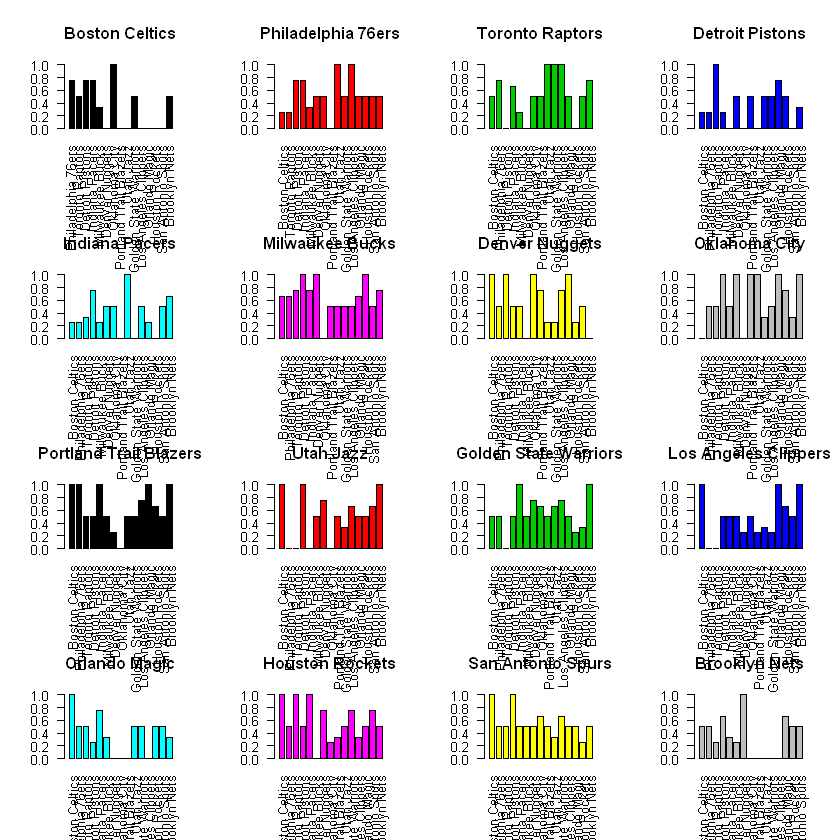

In [15]:
##save barplot

par(mfrow=c(4,4))
for (i in 1:16){
#    plot_name<-paste0('./analysis/plot',i)
#    plot_name<-paste0(plot_name,'.jpg')    
#    jpeg(plot_name)
    barplot(Mean_matrix[i,-i],main=TEAMS2[i] ,las=2,col=i)

#    dev.off() 
}

시즌 내 플레이오프 진출 팀에 대한 승률<br>
<br>
- Boston, Detroit, Orlando Brooklyn 등은 여러 팀에게 시즌 동안 한번도 못 이김
- Philadelphia, Portland, Golden State는 Toronto, Denver는 Milwaukee를 제외하고 한 번씩은 이겼음
- San Antonio는 모든 상대에게 승리를 한 경험이 있음
- Milwaukee는 Oklahoma City를 제외하고 모든 상대에게 승률이 50퍼센트 이상

In [16]:
#Data Frame

Total2<-c()
for (i in 1:16){
    Total<-c(TEAMS2[i],sum(df[[i]][,2]),mean(df[[i]][,2]))
    Total2<-rbind(Total2,Total)    
}
Total3<-Total2[order(Total2[,2], decreasing=TRUE),]
colnames(Total3)<-c('Team','Wins','Mean')
Total3

,Team,Wins,Mean
Total,Milwaukee Bucks,28,1.86666666666667
Total,Oklahoma City,26,1.73333333333333
Total,Portland Trail Blazers,25,1.66666666666667
Total,Denver Nuggets,24,1.6
Total,Houston Rockets,24,1.6
Total,Golden State Warriors,23,1.53333333333333
Total,Philadelphia 76ers,22,1.46666666666667
Total,Toronto Raptors,22,1.46666666666667
Total,San Antonio Spurs,22,1.46666666666667
Total,Utah Jazz,20,1.33333333333333


요약 테이블 <br>
- Milwaukee와 Oklahoma, Denver, Houston 등이 이긴 횟수가 가장 많음
- 하지만 특정 팀을 대상로만 강했을 수도 있고, 시즌 동안 강했던 상대를 플레이오프 동안 못 만날 수도 있음
- 따라서 이긴 횟수만으로 예측하기는 어려움

# 5. Independence Sampling

MCMC는 언제 사용할까?<br>
- Expected Posterior Mean이 intractable 한 경우
- Numerical methods로 계산하기 어려울 때 <br>

<b>Monte-Carlo Integration</b><br>
- $f_{\theta|x}$의 random sample $x_{1},...,x_{m}$이 independent 하면 목표 함수 $g(\theta)$의 기댓 값을 추정할 수 있음<br>
- 추정량이 $\bar{g}=\frac{1}{m}\sum g(x_{i})$라고 할 때 데이터가 많아지면 $\bar{g} -> E[g(\theta)]$로 수렴
- Monte-Carlo Integration은 시뮬레이션을 통해 이러한 수렴하는 성질을 이용<br>
- 직접 계산이 어려울 때 시뮬레이션을 통해 계산이 가능<br>

<b>Markov-Chain</b><br>
- 타겟 분포(사후 분포)로부터 random observation을 생성하여 sampler 역할을 함
- 타겟 분포가 복잡하여 할때 MCMC를 통해 타겟 분포에서 Sampling 할 수 있음

<b>Metropolis-Hastings</b><br>
- stationary distribution이 target distribution인 Markov chain을 생성함<br>
- $X_{t}$가 주어졌을 때 다음 $X_{t+1}$를 어떻게 생성할까?
- proposal distirbution $g(·|X_{t})$에서 생성된 후보군 $Y$가 accept 되면 $X_{t+1}$로 인정

1. proposal distribution 선택 $g(·|X_{t})$ 
2. g에서 X0 생성.
3. 반복 (chain이 stationary distribution에 수렴할 때까지):<br>
(a) $g(·|X_{t})$로부터 Y를 생성<br>
(b) Uniform(0,1)에서 U를 생성<br>
(c) If $U ≤ \frac{f(Y )g(X_{t}|Y )}{f(X_{t})g(Y |X_{t})}$<br>
<br>
accept $Y$ and set $X_{t+1} = Y$ ; otherwise set $X_{t+1} = X_{t}$<br>
(d) Increment t.<br>
<br>
참고로 step (3c)에서 후보 Y는 확률 $α(X_{t}, Y) =min(1,\frac{f(Y )g(X_{t}|Y )}{f(X_{t})g(Y |X_{t})})$로 accept


<b>Independence Sampler</b><br>
- proposal distribution은 이전 chain의 값에 영향 받지 않음 => $g(Y|X_{t})$<br>
- $α(X_{t}, Y) =min(1,\frac{f(Y )g(X_{t})}{f(X_{t})g(Y)})$


특징<br>
- 구현하기 쉬움
- proposal이 target density와 가깝게 설정되면 잘 작동함 but 그렇지 않으면 잘 작동 안함 => “it is rare for the independence sampler to be useful as a stand-alone algorithm.”

In [17]:
m <- 10000 #length of chain
independence.sampler<-function(win,n,a,b){


    xt <- numeric(m)

    # generate the independence sampler chain
    u <- runif(m)
    y <- rbeta(m, a, b) #proposal distribution
    for (i in 2:m) {
        fy <- (y[i]^win)*(1-y[i])^(n-win)
        fx <- (xt[i-1]^3)*(1-xt[i-1])

        r <- (fy / fx) *(xt[i-1]^(a-1) * (1-xt[i-1])^(b-1)) /(y[i]^(a-1) * (1-y[i])^(b-1))

        if (u[i] <= r) {xt[i] <- y[i]}
        else {
        xt[i] <- xt[i-1]}
    }
    return(xt)
}

In [18]:
sim_exp<-independence.sampler(Win_matrix[1,2],Count_matrix[1,2],1,1)

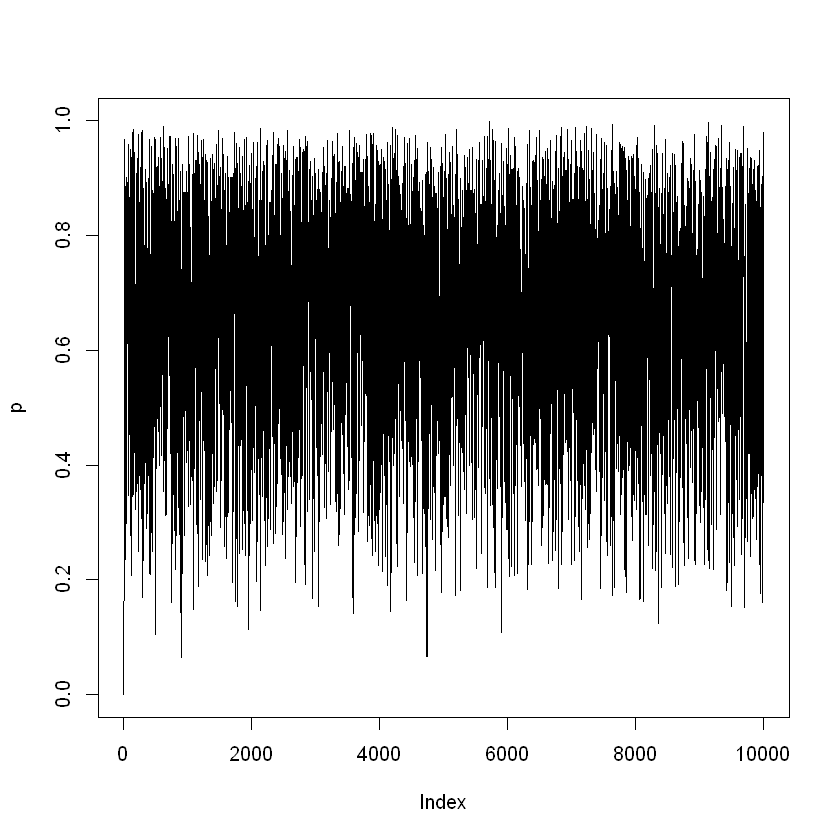

[1] 0.6653813


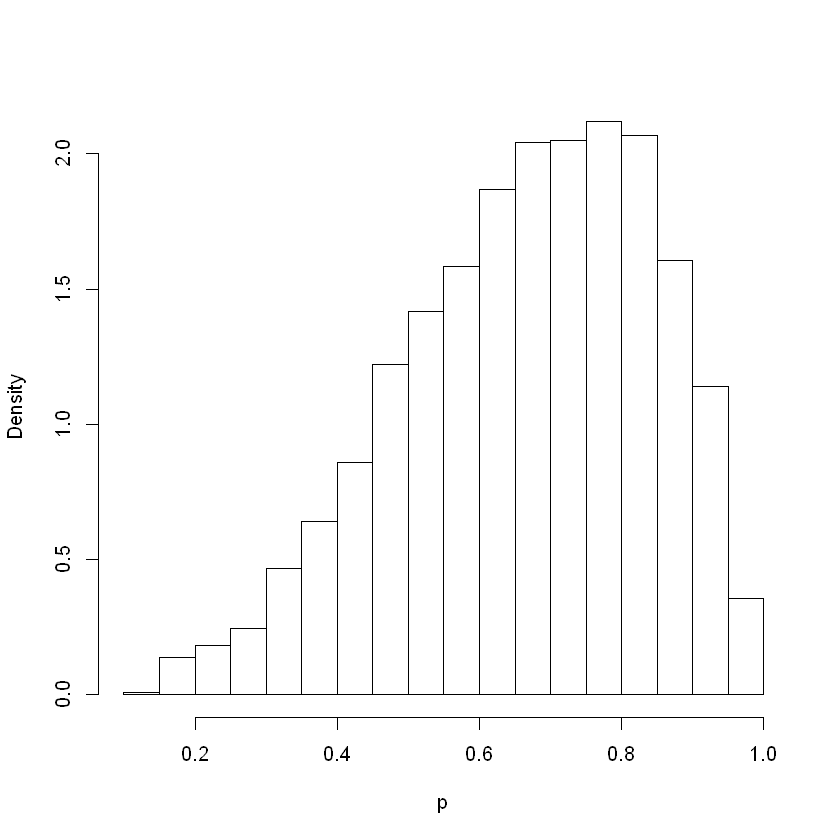

In [19]:
#convergence check
plot(sim_exp, type="l", ylab="p")
hist(sim_exp[((m/2) +1):m], main="", xlab="p", prob=TRUE)
print(mean(sim_exp[((m/2) +1):m]))

Independence Sampler를 이용해 사후 확률을 추정<br>
Trace plot: Markov-chain의 수렴성을 파악

In [25]:
Sim_matrix=matrix(0,16,16)
colnames(Sim_matrix)=TEAMS2
rownames(Sim_matrix)=TEAMS2

In [28]:
set.seed(0)
for (i in 1:16){
    for (j in 1:16){
                if ( is.na(Count_matrix[i,j])==TRUE){
                    Sim_matrix[i,j]<-NA
                }
                else{
                    BB<-independence.sampler(Win_matrix[i,j],Count_matrix[i,j],1,1)
                    Sim_matrix[i,j]<-mean(BB[((m/2) +1):m])
                   }
    }
}

In [29]:
#posterior mean
Sim_matrix

,Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
Boston Celtics,NA,0.6653813,0.5635705,0.6653813,0.6653813,0.4670037,0.4542285,0.5839276,0.4542285,0.4542285,0.5068196,0.4542285,0.4244410,0.4542285,0.4542285,0.5635705
Philadelphia 76ers,0.4396191,NA,0.4396191,0.6653813,0.6653813,0.4670037,0.5068196,0.5068196,0.4542285,0.5839276,0.5068196,0.5839276,0.5635705,0.5068196,0.5068196,0.5635705
Toronto Raptors,0.5635705,0.6653813,NA,0.4244410,0.5863357,0.4396191,0.4542285,0.5068196,0.5068196,0.5839276,0.5839276,0.5839276,0.5635705,0.4542285,0.5068196,0.6653813
Detroit Pistons,0.4396191,0.4396191,0.6503997,NA,0.4396191,0.3910442,0.5068196,0.4542285,0.5068196,0.4542285,0.5068196,0.5068196,0.6653813,0.5068196,0.4542285,0.4670037
Indiana Pacers,0.4396191,0.4396191,0.4670037,0.6653813,NA,0.4396191,0.5068196,0.5068196,0.4542285,0.5839276,0.4542285,0.5068196,0.4396191,0.4542285,0.5068196,0.5863357
Milwaukee Bucks,0.5863357,0.5863357,0.6653813,0.7007858,0.6653813,NA,0.5839276,0.4542285,0.5068196,0.5068196,0.5068196,0.5068196,0.5863357,0.5839276,0.5068196,0.6653813
Denver Nuggets,0.5839276,0.5068196,0.5839276,0.5068196,0.5068196,0.4542285,NA,0.7007858,0.6653813,0.4396191,0.4396191,0.6653813,0.5839276,0.4396191,0.5635705,0.4542285
Oklahoma City,0.4542285,0.5068196,0.5068196,0.5839276,0.5068196,0.5839276,0.3910442,NA,0.7007858,0.7007858,0.4670037,0.5635705,0.5839276,0.6653813,0.4670037,0.5839276
Portland Trail Blazers,0.5839276,0.5839276,0.5068196,0.5068196,0.5839276,0.5068196,0.4396191,0.3910442,NA,0.5635705,0.5635705,0.6653813,0.5839276,0.5863357,0.5635705,0.5839276
Utah Jazz,0.5839276,0.4542285,0.4542285,0.5839276,0.4542285,0.5068196,0.6653813,0.3910442,0.5635705,NA,0.4670037,0.5863357,0.5068196,0.5635705,0.5863357,0.5839276


In [30]:
Sim_matrix2<-Sim_matrix

In [31]:
Sim_matrix2[lower.tri(Sim_matrix2)] = 1-t(Sim_matrix2)[lower.tri(Sim_matrix2)]

In [32]:
Sim_matrix2

,Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
Boston Celtics,NA,0.6653813,0.5635705,0.6653813,0.6653813,0.4670037,0.4542285,0.5839276,0.4542285,0.4542285,0.5068196,0.4542285,0.4244410,0.4542285,0.4542285,0.5635705
Philadelphia 76ers,0.3346187,NA,0.4396191,0.6653813,0.6653813,0.4670037,0.5068196,0.5068196,0.4542285,0.5839276,0.5068196,0.5839276,0.5635705,0.5068196,0.5068196,0.5635705
Toronto Raptors,0.4364295,0.5603809,NA,0.4244410,0.5863357,0.4396191,0.4542285,0.5068196,0.5068196,0.5839276,0.5839276,0.5839276,0.5635705,0.4542285,0.5068196,0.6653813
Detroit Pistons,0.3346187,0.3346187,0.5755590,NA,0.4396191,0.3910442,0.5068196,0.4542285,0.5068196,0.4542285,0.5068196,0.5068196,0.6653813,0.5068196,0.4542285,0.4670037
Indiana Pacers,0.3346187,0.3346187,0.4136643,0.5603809,NA,0.4396191,0.5068196,0.5068196,0.4542285,0.5839276,0.4542285,0.5068196,0.4396191,0.4542285,0.5068196,0.5863357
Milwaukee Bucks,0.5329963,0.5329963,0.5603809,0.6089558,0.5603809,NA,0.5839276,0.4542285,0.5068196,0.5068196,0.5068196,0.5068196,0.5863357,0.5839276,0.5068196,0.6653813
Denver Nuggets,0.5457715,0.4931804,0.5457715,0.4931804,0.4931804,0.4160724,NA,0.7007858,0.6653813,0.4396191,0.4396191,0.6653813,0.5839276,0.4396191,0.5635705,0.4542285
Oklahoma City,0.4160724,0.4931804,0.4931804,0.5457715,0.4931804,0.5457715,0.2992142,NA,0.7007858,0.7007858,0.4670037,0.5635705,0.5839276,0.6653813,0.4670037,0.5839276
Portland Trail Blazers,0.5457715,0.5457715,0.4931804,0.4931804,0.5457715,0.4931804,0.3346187,0.2992142,NA,0.5635705,0.5635705,0.6653813,0.5839276,0.5863357,0.5635705,0.5839276
Utah Jazz,0.5457715,0.4160724,0.4160724,0.5457715,0.4160724,0.4931804,0.5603809,0.2992142,0.4364295,NA,0.4670037,0.5863357,0.5068196,0.5635705,0.5863357,0.5839276


# 6. Conjugacy

위 모델링은 Conjugacy를 이용하여 simulation 없이 사후 기대 확률을 쉽게 구할 수 있음

In [33]:
post_exp<-function(y,n,a,b){
    A<-(y+a)/(n+a+b)
    return(A)
}

먼저 $\alpha, \beta$를 1로 두어 Noninformative prior를 사용해 분석

In [34]:
Posterior_expectation<-post_exp(Win_matrix,Count_matrix,1,1)
Posterior_expectation

,Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
Boston Celtics,NA,0.6666667,0.5000000,0.6666667,0.6666667,0.4000000,0.2500000,0.7500000,0.2500000,0.2500000,0.5000000,0.2500000,0.2000000,0.2500000,0.2500000,0.5000000
Philadelphia 76ers,0.3333333,NA,0.3333333,0.6666667,0.6666667,0.4000000,0.5000000,0.5000000,0.2500000,0.7500000,0.5000000,0.7500000,0.5000000,0.5000000,0.5000000,0.5000000
Toronto Raptors,0.5000000,0.6666667,NA,0.2000000,0.6000000,0.3333333,0.2500000,0.5000000,0.5000000,0.7500000,0.7500000,0.7500000,0.5000000,0.2500000,0.5000000,0.6666667
Detroit Pistons,0.3333333,0.3333333,0.8000000,NA,0.3333333,0.1666667,0.5000000,0.2500000,0.5000000,0.2500000,0.5000000,0.5000000,0.6666667,0.5000000,0.2500000,0.4000000
Indiana Pacers,0.3333333,0.3333333,0.4000000,0.6666667,NA,0.3333333,0.5000000,0.5000000,0.2500000,0.7500000,0.2500000,0.5000000,0.3333333,0.2500000,0.5000000,0.6000000
Milwaukee Bucks,0.6000000,0.6000000,0.6666667,0.8333333,0.6666667,NA,0.7500000,0.2500000,0.5000000,0.5000000,0.5000000,0.5000000,0.6000000,0.7500000,0.5000000,0.6666667
Denver Nuggets,0.7500000,0.5000000,0.7500000,0.5000000,0.5000000,0.2500000,NA,0.8333333,0.6666667,0.3333333,0.3333333,0.6666667,0.7500000,0.3333333,0.5000000,0.2500000
Oklahoma City,0.2500000,0.5000000,0.5000000,0.7500000,0.5000000,0.7500000,0.1666667,NA,0.8333333,0.8333333,0.4000000,0.5000000,0.7500000,0.6666667,0.4000000,0.7500000
Portland Trail Blazers,0.7500000,0.7500000,0.5000000,0.5000000,0.7500000,0.5000000,0.3333333,0.1666667,NA,0.5000000,0.5000000,0.6666667,0.7500000,0.6000000,0.5000000,0.7500000
Utah Jazz,0.7500000,0.2500000,0.2500000,0.7500000,0.2500000,0.5000000,0.6666667,0.1666667,0.5000000,NA,0.4000000,0.6000000,0.5000000,0.5000000,0.6000000,0.7500000


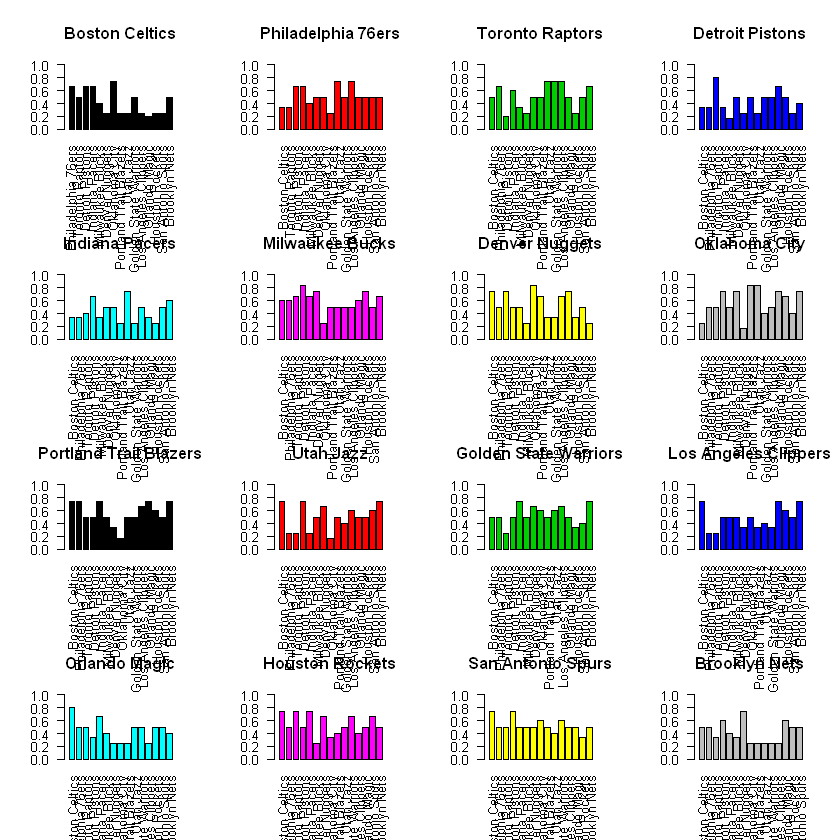

In [36]:
par(mfrow=c(4,4))
for (i in 1:16){
#    jpeg(plot_name)
    barplot(Posterior_expectation[i,-i],main=TEAMS2[i] ,las=2,col=i,ylim=c(0,1))
#    plot_name<-paste0('./analysis/plot',i)
#    plot_name<-paste0(plot_name,'.jpg')

#    dev.off() 
}

- $\alpha, \beta$를 1로 두어 Uniform 사전 분포 사용 (많이 사용되는 하이퍼 파라미터)
- 베이지안 사후 기대 확률(기대 승률)을 팀별로 분석
- 사후 기대 승률은 과거 상대 전적 데이터가 주어졌을 때의 업데이트 된 승률을 계산
- 모든 팀들이 상대 팀들을 이길 가능성이 존재하게 됨 (모두 0값이 아님)
- 다른 팀에 대해 극단적으로 이길 가능성이 줄어들음

# 7. Monte Carlo Simulation

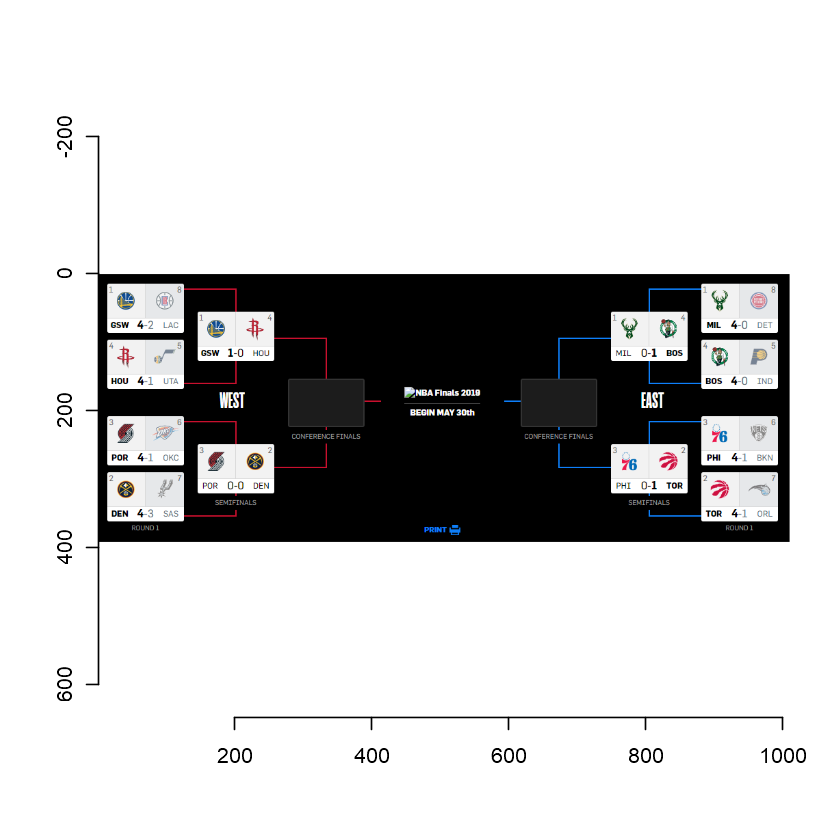

In [39]:
#install.packages('imager',repo="https://cloud.r-project.org")
library(imager)
im<-load.image("./NBA_playoff.png")
plot(im)

출처 :https://www.nba.com/playoffs#/ <br>
위 사진은 이미 16강이 진행된 대진표이지만 실제 분석에서는 경기가 하나도 진행 안 됐다고 가정

Simulation 절차:
1. 플레이오프 대진표 대로 경기를 하게 함
2. 계산된 MLE 혹은 사후 기대확률을 통해 7번의 경기를 치루게함
3. 7번 중 4회 이상 이긴 팀이 다음 라운드로 진출
4. 위와 같은 절차를 10,000번 반복해 평균 우승 확률을 추정

In [40]:
set.seed(0)

finalwinner<-function(R,Posterior_expectation){
    final <- numeric(R)
    for (i in 1:R){



    # Golden state defeats Clippers (11,12)
    v11<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[11,12],1-Posterior_expectation[11,12]))
    if (sum(v11)>=4){
    w11 <- 11
    } else{
    w11 <- 12
    }

    # Houston defeats Utah (14,10)
    v12<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[14,10],1-Posterior_expectation[14,10]))
    if (sum(v12)>=4){
    w12 <- 14
    } else{
    w12 <- 10
    }


    # Portland defeats Oklahoma (9,8)
    v13<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[9,8],1-Posterior_expectation[9,8]))
    if (sum(v13)>=4){
    w13 <- 9
    } else{
    w13 <- 8
    }

    # Denver defeats San Antonio(7,15)
    v14<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[7,15],1-Posterior_expectation[7,15]))
    if (sum(v14)>=4){
    w14 <- 7
    } else{
    w14 <- 15
    }

    # Milwaukee defeats Detroit (6,4)
    v15<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[6,4],1-Posterior_expectation[6,4]))
    if (sum(v15)>=4){
    w15 <- 6
    } else{
    w15 <- 4
    }

    # Boston defeats Indiana(1,5)
    v16<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[1,5],1-Posterior_expectation[1,5]))
    if (sum(v16)>=4){
    w16 <- 1
    } else{
    w16 <- 5
    }



    # Philadelphia defeats Brooklyn(2,16)
    v17<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[2,16],1-Posterior_expectation[2,16]))
    if (sum(v17)>=4){
    w17 <- 2
    } else{
    w17 <- 16
    }


    # Torront defeats Orlando (3,13)
    v18<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[3,13],1-Posterior_expectation[3,13]))
    if (sum(v18)>=4){
    w18 <- 3
    } else{
    w18 <- 13
    }


    ####8
    v21<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[w11,w12],1-Posterior_expectation[w11,w12]))
    if (sum(v21)>=4){
    w21 <- w11
    } else{
    w21 <- w12
    }

    v22<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[w13,w14],1-Posterior_expectation[w13,w14]))
    if (sum(v22)>=4){
    w22 <- w13
    } else{
    w22 <- w14
    }

    v23<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[w15,w16],1-Posterior_expectation[w15,w16]))
    if (sum(v23)>=4){
    w23 <- w15
    } else{
    w23 <- w16
    }

    v24<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[w11,w12],1-Posterior_expectation[w11,w12]))
    if (sum(v24)>=4){
    w24 <- w17
    } else{
    w24 <- w18
    }


    #######semi-final

    v31<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[w21,w22],1-Posterior_expectation[w21,w22]))
    if (sum(v31)>=4){
    w31 <- w21
    } else{
    w31 <- w22
    }

    v32<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[w23,w24],1-Posterior_expectation[w23,w24]))
    if (sum(v32)>=4){
    w32 <- w23
    } else{
    w32 <- w24
    }

    #######Final


    v41<-sample(c(1,0),7,replace=TRUE,prob=c(Posterior_expectation[w31,w32],1-Posterior_expectation[w31,w32]))
    if (sum(v41)>=4){
    final[i] <- w31
    } else{
    final[i] <- w32
    }
    
    }#end of for loop    
    out <- data.frame(mean(final==1),mean(final==2),mean(final==3),mean(final==4),mean(final==5),mean(final==6),mean(final==7),mean(final==8),mean(final==9),mean(final==10),mean(final==11),mean(final==12),mean(final==13),mean(final==14),mean(final==15),mean(final==16))
    colnames(out) <- TEAMS2
        return(out)
}

<b>MLE</b>

In [41]:
Frequentist<-finalwinner(10000,Mean_matrix)
Frequentist

Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0.0151,0.0249,0.0098,0,3e-04,0.5069,0.0102,0.0466,0,0.047,0.1245,0.0055,0.0362,0.0713,0.0943,0.0074


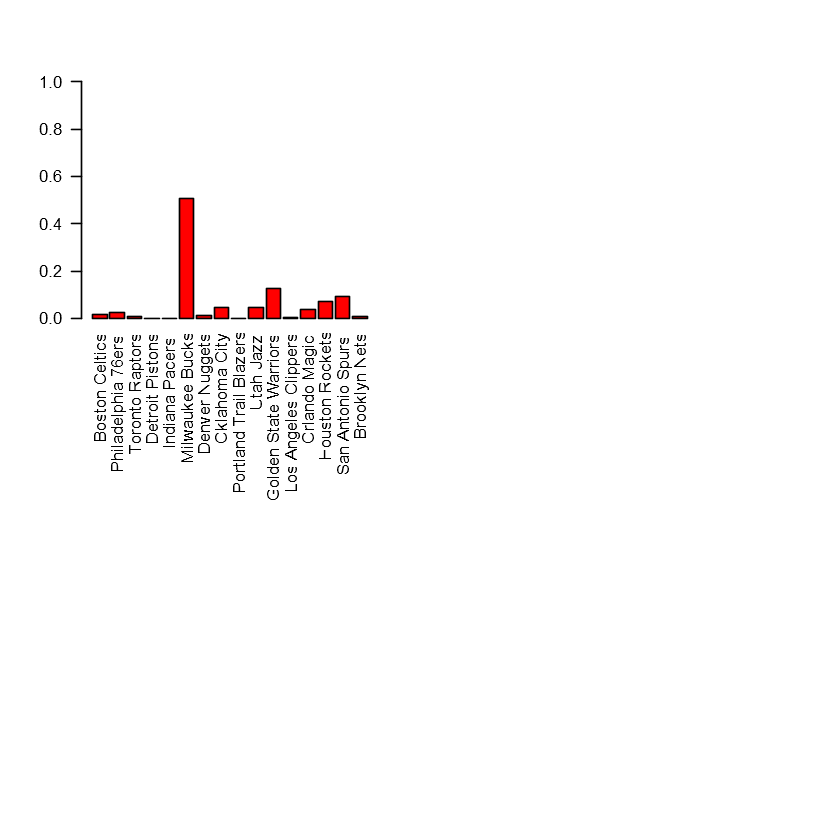

In [42]:
###MLE

par(mfrow=c(2,2))
barplot(as.matrix(Frequentist[1,]),las=2 ,col=2,ylim=c(0,1))

- 10,000번 중 Milwaukee가 5,000번을 넘게 우승
- 다른 팀들의 우승 횟수가 전반적으로 너무 낮아 비현실적 (2등인 Golden state가 1,300번)
- Detroit, Indiana, Oklahoma, Portland, Brooklyn은 거의 0%

<b>Bayesian with Independence Sampler vs Conjugacy</b>

Independence Sampler를 이용해서 추정된 확률과 Conjugacy를 이용해 바로 계산한 결과를 비교<br>
Conjugacy를 이용한 결과가 더 정확한 계산이지만 Independence Sampler를 이용하면 더 많은 randomness가 반영될 수 있음

In [46]:
Bayes_sim<-finalwinner(10000,Sim_matrix2)
Bayes_sim

Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0.1343,0.0626,0.0685,0.0113,0.0142,0.1579,0.1143,0.0694,0.0156,0.0752,0.1088,0.0121,0.0373,0.0562,0.0415,0.0208


In [47]:
### Bayesian
Bayesian<-finalwinner(10000,Posterior_expectation)
Bayesian

Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0.0278,0.0374,0.0318,8e-04,0.0028,0.3383,0.0411,0.0777,0.0019,0.0612,0.1175,0.0172,0.0552,0.0932,0.0793,0.0168


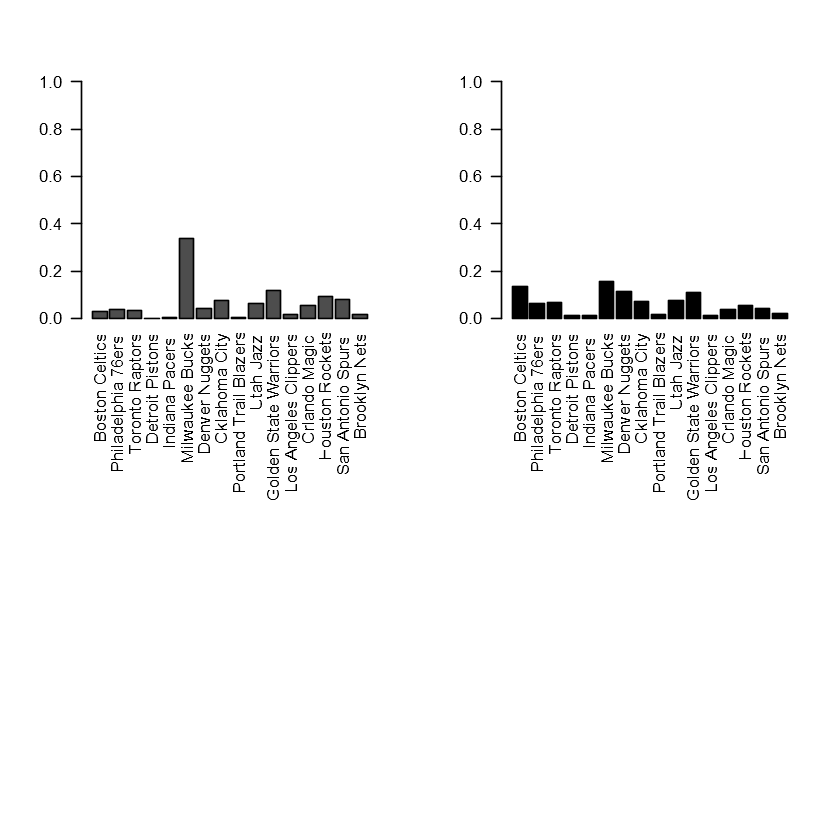

In [48]:
par(mfrow=c(2,2))
barplot(as.matrix(Bayesian[1,]),las=2,ylim=c(0,1))
barplot(as.matrix(Bayes_sim[1,]),las=2,ylim=c(0,1),col=1)

Conjugacy 이용했을 때 (왼쪽 그림 )
- Milwaukee의 우승 확률이 34.6%로 하향 조정, 2위 Golden State도 하향 됨
- Toronto, Houston 등의 우승 확률 소폭 증가
- 전체적인 우승 예측 경향이 MLE 방식과 큰 차이가 있지는 않음
- Detroit의 우승 확률은 여전히 0

Independency 이용했을 때 (오른쪽 그림 )
- Independence sampler로 sampling 한 후 시뮬레이션 했을 때 왼쪽과 같이 Boston, Golden State, Denver, Utah의 우승 확률이 높아짐

# <b>8. 하이퍼 파리미터 조절</b>

Bayesian Poseterior Mean<br>
$E[p_{i,j}|Y_{i,j}]=\frac{y_{i,j}+\alpha}{n_{i,j}+\alpha+\beta} $<br>
$=\frac{n_{i,j}y_{i,j}}{n_{i,j}(n_{i,j}+\alpha+\beta)}+\frac{(\alpha+\beta)\alpha}{(\alpha+\beta)(n_{i,j}+\alpha+\beta) } $<br>
$=\frac{n_{i,j}} {n_{i,j}+\alpha+\beta}\hat{y}_{MLE}+\frac{\alpha+\beta}{n_{i,j}+\alpha+\beta}E[p] $

$(\alpha +\beta)$를 감소 시킬 수록 MLE에 가까워지고 증가시킬수록 prior mean에 가까워짐<br>
$\alpha, \beta$의 값에 따라 beta 분포의 모양이 달라지기 때문에 어떤 값을 설정하느냐가 중요

In [49]:
Posterior_expectation2<-post_exp(Win_matrix,Count_matrix,0.5,0.5) #Non informative
Posterior_expectation3<-post_exp(Win_matrix,Count_matrix,3,3) # stronger uniform prior
Posterior_expectation4<-post_exp(Win_matrix,Count_matrix,100,1) #biased for winning
Posterior_expectation5<-post_exp(Win_matrix,Count_matrix,1,100) #biased for losing
Posterior_expectation6<-post_exp(Win_matrix,Count_matrix,0.01,0.01) #unfair coin

출처: https://www.cs.ubc.ca/labs/lci/mlrg/slides/Conjugate.pdf

In [50]:
Bayesian2<-finalwinner(10000,Posterior_expectation2)
Bayesian3<-finalwinner(10000,Posterior_expectation3)
Bayesian4<-finalwinner(10000,Posterior_expectation4)
Bayesian5<-finalwinner(10000,Posterior_expectation5)
Bayesian6<-finalwinner(10000,Posterior_expectation6)


In [51]:
Bayesian
Bayesian2
Bayesian3
Bayesian4
Bayesian5
Bayesian6

Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0.0278,0.0374,0.0318,8e-04,0.0028,0.3383,0.0411,0.0777,0.0019,0.0612,0.1175,0.0172,0.0552,0.0932,0.0793,0.0168


Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0.0218,0.0296,0.0212,0,0.0023,0.4113,0.025,0.065,3e-04,0.0565,0.124,0.011,0.0462,0.086,0.0873,0.0125


Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0.0494,0.0503,0.0496,0.0085,0.0167,0.2057,0.0706,0.0859,0.0188,0.0654,0.0971,0.0287,0.0596,0.087,0.0712,0.0355


Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0.0165,0.0238,0.0106,0,2e-04,0.4961,0.011,0.0471,0,0.0502,0.1303,0.0064,0.0358,0.0727,0.0927,0.0066


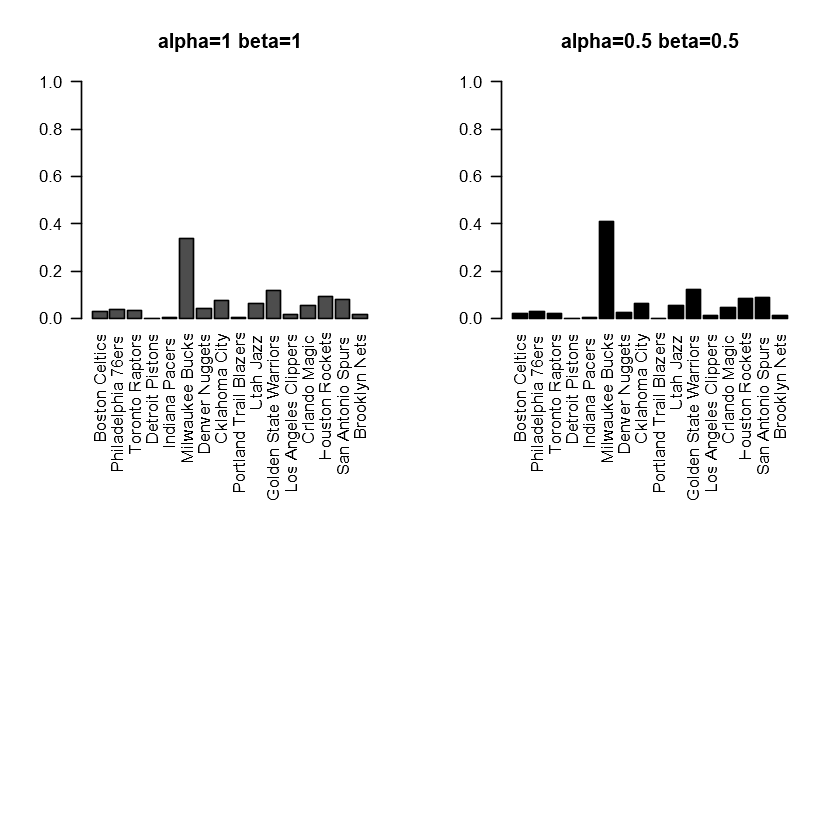

In [52]:
par(mfrow=c(2,2))
barplot(as.matrix(Bayesian[1,]),las=2,ylim=c(0,1), main='alpha=1 beta=1')
barplot(as.matrix(Bayesian2[1,]),las=2,ylim=c(0,1),col=1, main='alpha=0.5 beta=0.5')


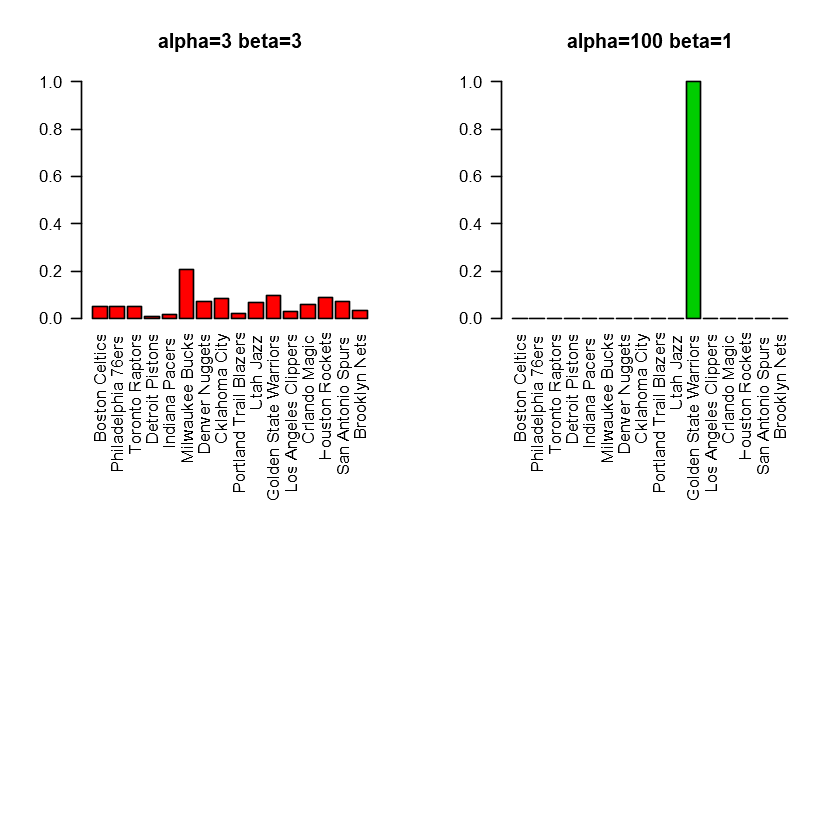

In [53]:
par(mfrow=c(2,2))
barplot(as.matrix(Bayesian3[1,]),las=2,ylim=c(0,1),col=2, main='alpha=3 beta=3')
barplot(as.matrix(Bayesian4[1,]),las=2,ylim=c(0,1),col=3, main='alpha=100 beta=1')


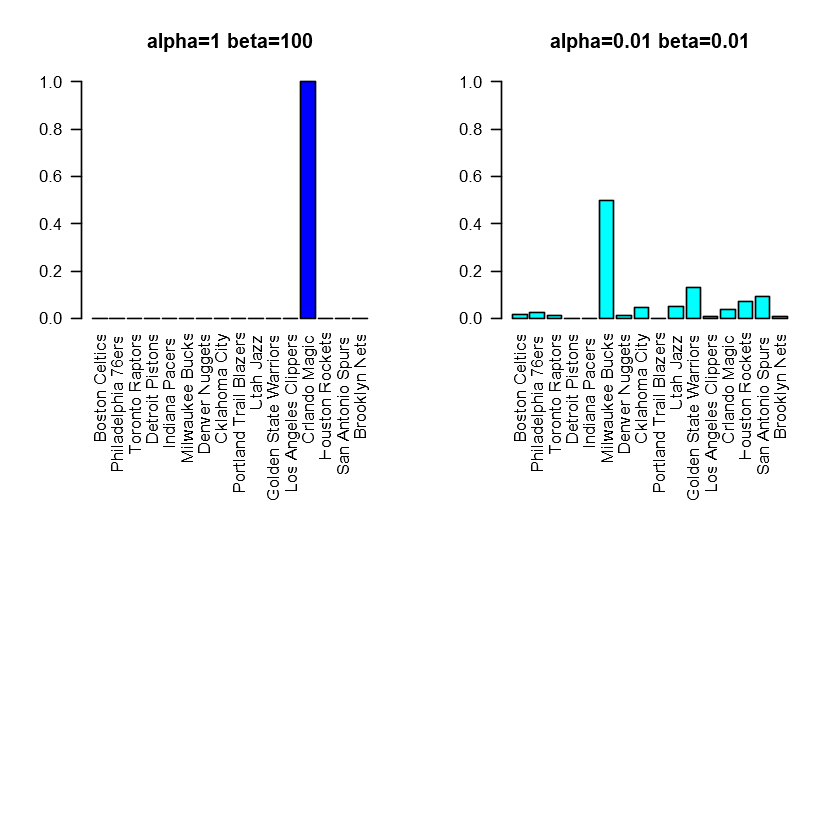

In [54]:
par(mfrow=c(2,2))
barplot(as.matrix(Bayesian5[1,]),las=2,ylim=c(0,1),col=4, main='alpha=1 beta=100')
barplot(as.matrix(Bayesian6[1,]),las=2,ylim=c(0,1),col=5, main='alpha=0.01 beta=0.01')

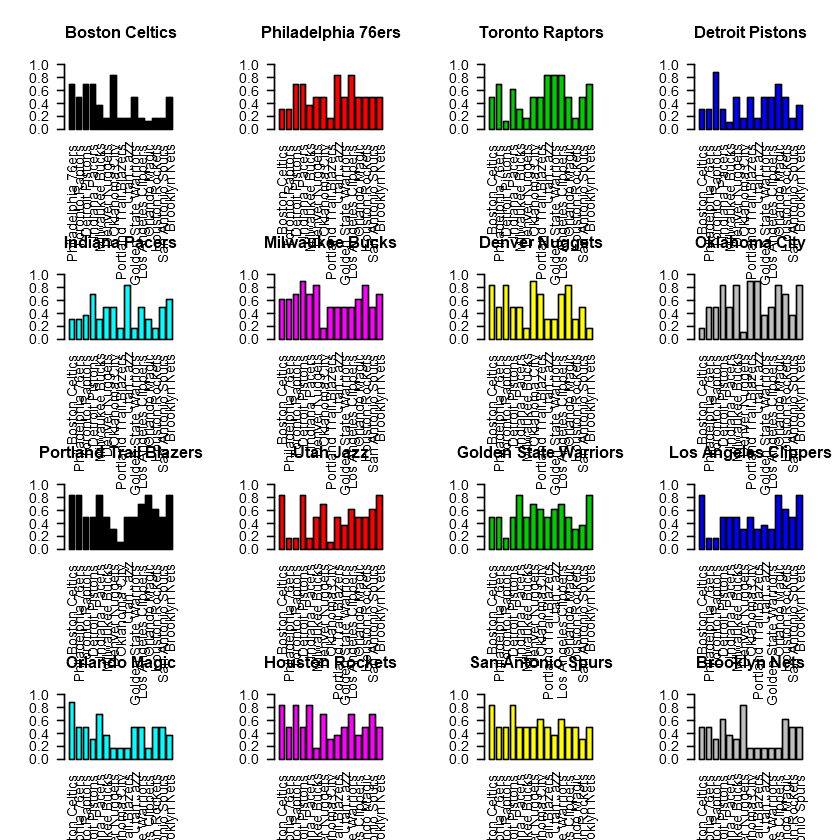

In [213]:
par(mfrow=c(4,4))
for (i in 1:16){

    barplot(Posterior_expectation2[i,-i],main=TEAMS2[i] ,las=2,col=i,ylim=c(0,1))

}

In [55]:
Sim_matrix2=matrix(0,16,16)
colnames(Sim_matrix2)=TEAMS2
rownames(Sim_matrix2)=TEAMS2

In [56]:
Sim_mean<-function(Sim_matrix,a,b){
    for (i in 1:16){
        for (j in 1:16){
            if ( is.na(Count_matrix[i,j])==TRUE){
                Sim_matrix[i,j]<-NA
            }
            else{
                BB<-independence.sampler(Win_matrix[i,j],Count_matrix[i,j],a,b)
                Sim_matrix[i,j]<-mean(BB[((m/2) +1):m])


            }

        }

    }
    return(Sim_matrix)
}    

In [57]:
a<-Sim_mean(Sim_matrix2,0.5,0.5)


In [61]:
Bayes_sim2<-finalwinner(10000,a)

In [63]:
Bayes_sim
Bayes_sim2

Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0.1343,0.0626,0.0685,0.0113,0.0142,0.1579,0.1143,0.0694,0.0156,0.0752,0.1088,0.0121,0.0373,0.0562,0.0415,0.0208


Boston Celtics,Philadelphia 76ers,Toronto Raptors,Detroit Pistons,Indiana Pacers,Milwaukee Bucks,Denver Nuggets,Oklahoma City,Portland Trail Blazers,Utah Jazz,Golden State Warriors,Los Angeles Clippers,Orlando Magic,Houston Rockets,San Antonio Spurs,Brooklyn Nets
0.0579,0.0466,0.0325,0.0085,0.0048,0.2589,0.0559,0.0763,0.0255,0.0409,0.1618,0.0292,0.0271,0.1215,0.0386,0.014


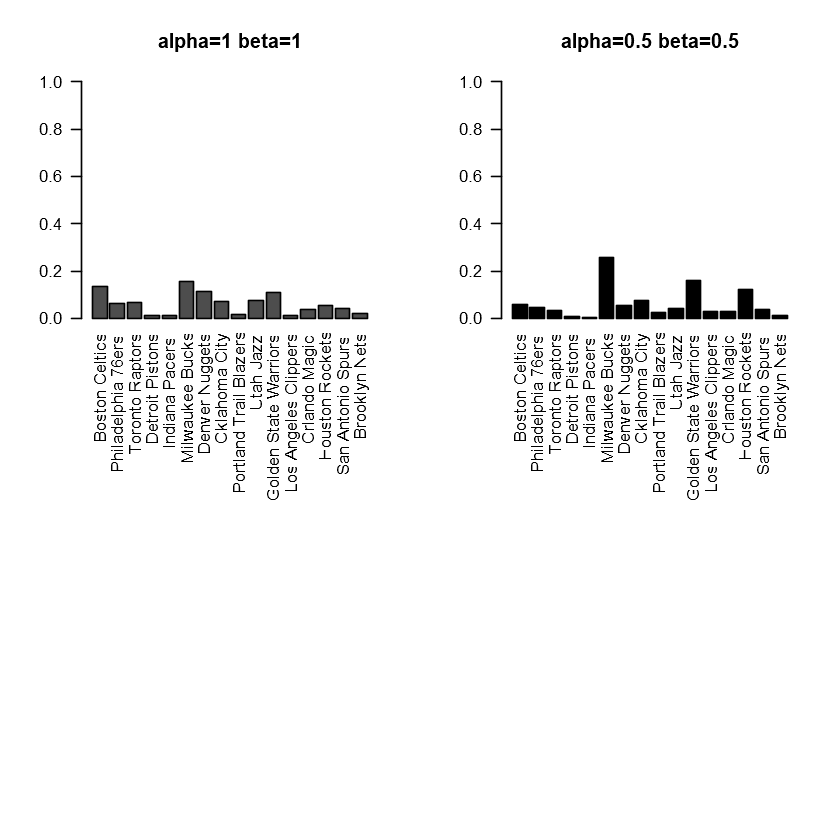

In [64]:
par(mfrow=c(2,2))
barplot(as.matrix(Bayes_sim[1,]),las=2,ylim=c(0,1), main='alpha=1 beta=1')
barplot(as.matrix(Bayes_sim2[1,]),las=2,ylim=c(0,1),col=1, main='alpha=0.5 beta=0.5')

# 